✅ Training data shape: (60000, 28, 28, 1) (60000, 10)
✅ Testing data shape: (10000, 28, 28, 1) (10000, 10)


d:\Python\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.7976 - loss: 0.6403 - val_accuracy: 0.9847 - val_loss: 0.0586
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9684 - loss: 0.1061 - val_accuracy: 0.9888 - val_loss: 0.0403
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9771 - loss: 0.0735 - val_accuracy: 0.9885 - val_loss: 0.0385
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9829 - loss: 0.0586 - val_accuracy: 0.9900 - val_loss: 0.0327
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9846 - loss: 0.0502 - val_accuracy: 0.9903 - val_loss: 0.0319
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9872 - loss: 0.0433 - val_accuracy: 0.9913 - val_loss: 0.0332
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9888 - loss: 0.0387 - val_accuracy: 0.9912 - val_loss: 0.0322
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9892 - loss: 0.0337 - val_accu

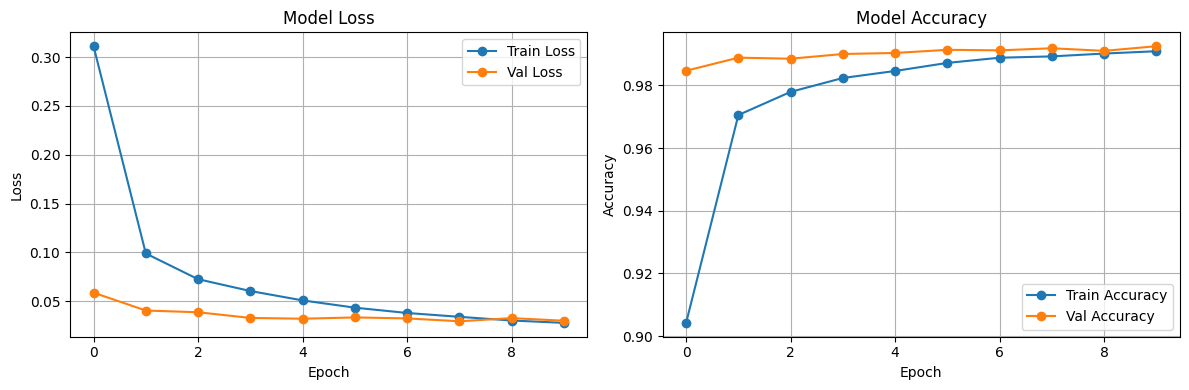

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


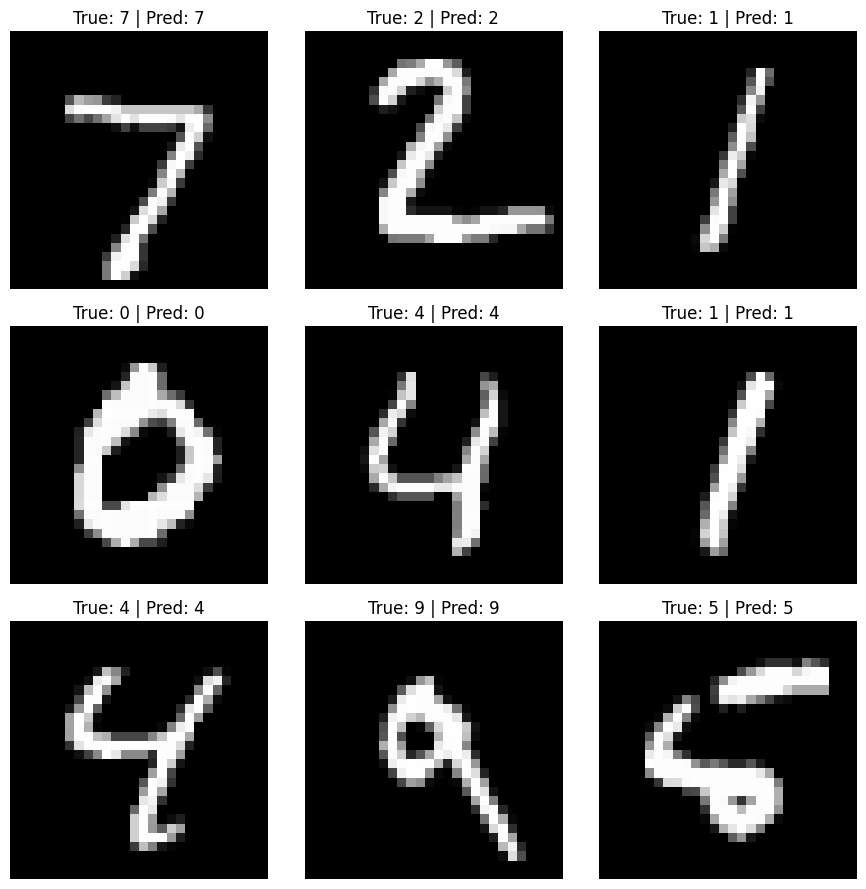

In [1]:
# ===============================================================
# (a) LOADING AND PREPROCESSING THE IMAGE DATA
# ===============================================================
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import os

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Paths to your local files
train_path = "mnist_train.csv"
test_path  = "mnist_test.csv"

def load_mnist_csv(path, img_size=28):
    df = pd.read_csv(path, header=0)
    df = df.apply(pd.to_numeric, errors='coerce').dropna()
    
    y = df.iloc[:, 0].astype(int).values
    X = df.iloc[:, 1:].astype("float32").values
    
    # Normalize pixel values
    X /= 255.0
    
    # Reshape into 4D tensor for CNN (samples, height, width, channels)
    X = X.reshape(-1, img_size, img_size, 1)
    
    return X, y

# Load training and testing data
X_train, y_train = load_mnist_csv(train_path)
X_test, y_test = load_mnist_csv(test_path)

# One-hot encode labels
num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)

print("✅ Training data shape:", X_train.shape, y_train_cat.shape)
print("✅ Testing data shape:", X_test.shape, y_test_cat.shape)

# ===============================================================
# (b) DEFINING THE MODEL'S ARCHITECTURE
# ===============================================================
model = models.Sequential([
    # Convolutional Block 1
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    # Convolutional Block 2
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ===============================================================
# (c) TRAINING THE MODEL
# ===============================================================
history = model.fit(
    X_train, y_train_cat,
    validation_split=0.1,
    epochs=10,
    batch_size=128,
    verbose=1
)

# ===============================================================
# (d) ESTIMATING THE MODEL'S PERFORMANCE
# ===============================================================
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Plot training loss & accuracy
plt.figure(figsize=(12,4))

# Loss plot
plt.subplot(1,2,1)
plt.plot(history.history['loss'], marker='o', label='Train Loss')
plt.plot(history.history['val_loss'], marker='o', label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy plot
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], marker='o', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], marker='o', label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ===============================================================
# Optional: Display sample predictions
# ===============================================================
preds = np.argmax(model.predict(X_test[:9]), axis=1)
plt.figure(figsize=(9,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[i]} | Pred: {preds[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D , Dropout

In [20]:
np.random.seed(42)
tf.random.set_seed(42)

In [21]:
train_path = "mnist_train.csv"
test_path = "mnist_test.csv"

In [29]:
def load_mnist_csv(path , img_size = 28):
  df = pd.read_csv(path , header = 0)
  df = df.apply(pd.to_numeric , errors = 'coerce').dropna()

  y = df.iloc[:, 0].astype(int).values
  X = df.iloc[:, 1:].astype('float32').values

  X /= 255.0
  X = X.reshape(-1 , img_size , img_size , 1)

  return X,y


In [30]:
X_train , y_train = load_mnist_csv(train_path)
X_test , y_test = load_mnist_csv(test_path)


In [31]:
#one hot encoding
num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train , num_classes)
y_test_cat = to_categorical(y_test , num_classes)


In [32]:
#model
from tensorflow.keras import layers
model = Sequential([
  Conv2D(32 , (3,3) , activation="relu" , input_shape = (28 , 28 , 1)),
  layers.MaxPooling2D((2,2)),
  Conv2D(64 , (3,3) , activation="relu" ),
  layers.MaxPooling2D((2,2)),

  layers.Flatten(),
  Dense(128 , activation= "relu"),
  Dropout(0.5),
  Dense(num_classes , activation= "softmax")


])

c:\Users\Soham\Desktop\LP-IV\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
from tensorflow.keras.optimizers import Adam
model.compile( 
  optimizer = Adam(learning_rate = 0.001),
  loss = "categorical_crossentropy",
  metrics = ['accuracy']
)

In [34]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
#train
history = model.fit(
  X_train , y_train_cat,
  epochs = 10,
  batch_size = 128,
  validation_split = 0.1,
  verbose = 1
)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.9055 - loss: 0.3135 - val_accuracy: 0.9837 - val_loss: 0.0587
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 30s 70ms/step - accuracy: 0.9709 - loss: 0.0992 - val_accuracy: 0.9862 - val_loss: 0.0482
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 63ms/step - accuracy: 0.9778 - loss: 0.0750 - val_accuracy: 0.9887 - val_loss: 0.0386
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - accuracy: 0.9819 - loss: 0.0604 - val_accuracy: 0.9898 - val_loss: 0.0365
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - accuracy: 0.9846 - loss: 0.0508 - val_accuracy: 0.9897 - val_loss: 0.0372
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/step - accuracy: 0.9867 - loss: 0.0431 - val_accuracy: 0.9902 - val_loss: 0.0328
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 64ms/step - accuracy: 0.9876 - loss: 0.0392 - val_accuracy: 0.9912 - val_loss: 0.0327
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 64ms/step - accuracy: 0.9893 - loss: 0.0354 - 

In [38]:
print(history.history['accuracy'])

[0.9054999947547913, 0.9708889126777649, 0.9777963161468506, 0.9819444417953491, 0.9845555424690247, 0.9867222309112549, 0.9876111149787903, 0.9892963171005249, 0.9904814958572388, 0.991185188293457]
